In [189]:
# Load modules
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('darkgrid')

In [190]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


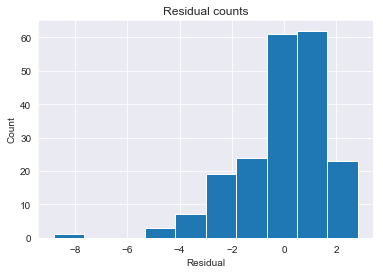

In [191]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

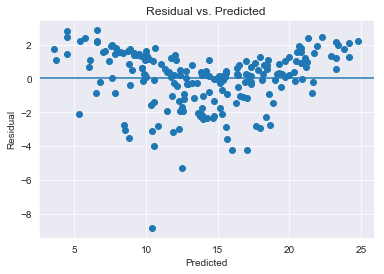

In [192]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [193]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

In [194]:
# Load data.

data1 = data.copy()
data1 = data1.drop('Unnamed: 0', axis=1)
data1.tail()

,TV,Radio,Newspaper,Sales
195,38.200,3.700,13.800,7.600
196,94.200,4.900,8.100,9.700
197,177.000,9.300,6.400,12.800
198,283.600,42.000,66.200,25.500
199,232.100,8.600,8.700,13.400


In [195]:
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


In [196]:
# Transforming features.

data1['TV_sqrt'] = data1['TV']**0.5
data1['Radio_sqrt'] = data1['Radio']**0.5
data1['Newspaper_sqrt'] = data1['Newspaper']**0.5
data1['Sales_sqrt'] = data1['Sales']**0.5
data1.head()

,TV,Radio,Newspaper,Sales,TV_sqrt,Radio_sqrt,Newspaper_sqrt,Sales_sqrt
0,230.100,37.800,69.200,22.100,15.169,6.148,8.319,4.701
1,44.500,39.300,45.100,10.400,6.671,6.269,6.716,3.225
2,17.200,45.900,69.300,9.300,4.147,6.775,8.325,3.050
3,151.500,41.300,58.500,18.500,12.309,6.427,7.649,4.301
4,180.800,10.800,58.400,12.900,13.446,3.286,7.642,3.592


In [197]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Ya = data1['Sales_sqrt'].values.reshape(-1, 1)
Xa = data1[['TV_sqrt', 'Radio_sqrt', 'Newspaper_sqrt']]
regr.fit(Xa, Ya)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(Xa, Ya))


Coefficients: 
 [[0.13722912 0.19745604 0.00810141]]

Intercept: 
 [1.18478263]

R-squared:
0.9236465643477566


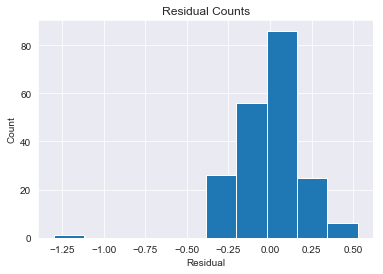

In [198]:
# Extract predicted values.
predicted1 = regr.predict(Xa).ravel()
actual1 = data1['Sales_sqrt']

# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

plt.hist(residual1)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

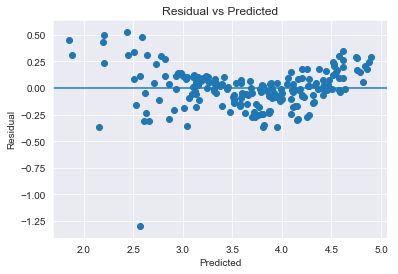

In [199]:
plt.scatter(predicted1, residual1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs Predicted')
plt.show()

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


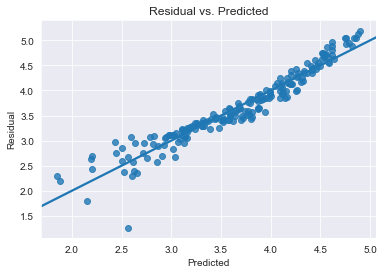

In [200]:
sns.regplot(predicted1, actual1, ci=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

In [201]:
correlation_matrix = Xa.corr()
display(correlation_matrix)

,TV_sqrt,Radio_sqrt,Newspaper_sqrt
TV_sqrt,1.000,0.040,0.042
Radio_sqrt,0.040,1.000,0.294
Newspaper_sqrt,0.042,0.294,1.000
